### This script contains the following:
#### Importing Libs
#### Importing Dataset
#### Create subset
#### Time-series analysis: decomposition
#### Testing for stationarity
#### Decomposition and Dickey-Fuller Test Interpretation
#### Autocorrelation Test
#### Stationarizing


## Importing Libs

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight')

## Importing Dataset

In [2]:
path = r'C:\Users\shyou\OneDrive\Documents\Data Analitics Course\Achievement6\Global SuperStore Project'

In [3]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data' , 'GlobalSuperstore_clean_3.csv'))

In [4]:
df.head()

,year_month,sales,net_profit,net_loss,profit
0,2011-01,138241,25498,12038,13460
1,2011-02,134970,27971,10388,17583
2,2011-03,171456,29268,13089,16179
3,2011-04,128833,22459,9049,13410
4,2011-05,148147,24807,10019,14788


### Create subset

In [5]:
sub_df = df[['year_month' , 'sales']]

In [6]:
sub_df

,year_month,sales
0,2011-01,138241
1,2011-02,134970
2,2011-03,171456
3,2011-04,128833
4,2011-05,148147
5,2011-06,189338
6,2011-07,162035
7,2011-08,219223
8,2011-09,255238
9,2011-10,204675


In [7]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year_month  48 non-null     object
 1   sales       48 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 896.0+ bytes


In [8]:

from datetime import datetime

sub_df['datetime'] = pd.to_datetime(sub_df['year_month']) # Create a datetime column from "order_date"
sub_df = sub_df.set_index('datetime') # Set the datetime as the index of the dataframe.
sub_df.drop(['year_month'], axis=1, inplace=True) 
sub_df.head()

,sales
datetime,
2011-01-01,138241
2011-02-01,134970
2011-03-01,171456
2011-04-01,128833
2011-05-01,148147


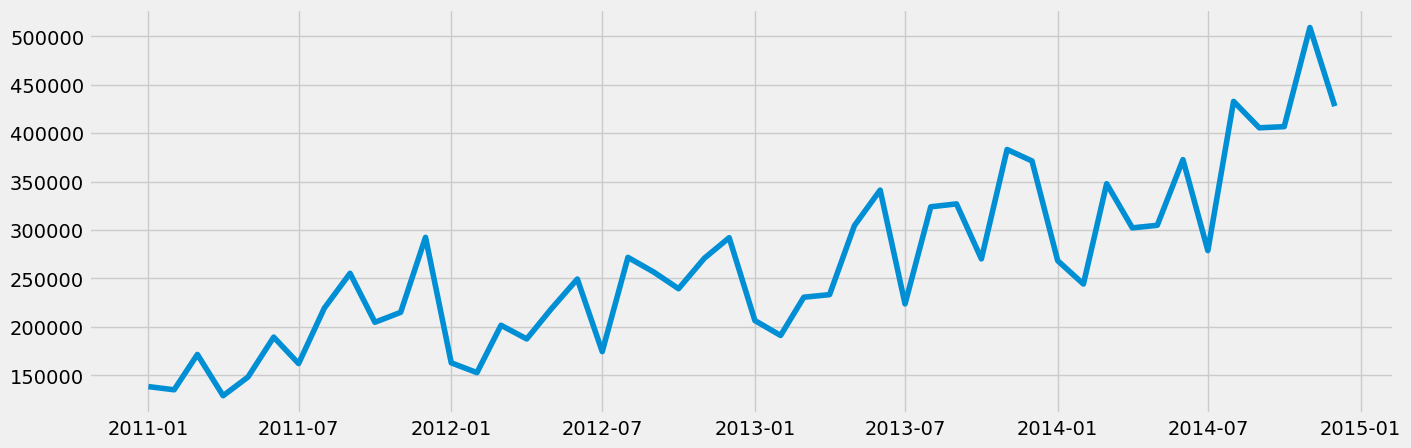

In [9]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(sub_df)

### Time-series analysis: decomposition

In [10]:
decomposition = sm.tsa.seasonal_decompose(sub_df, model='additive')

In [11]:
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

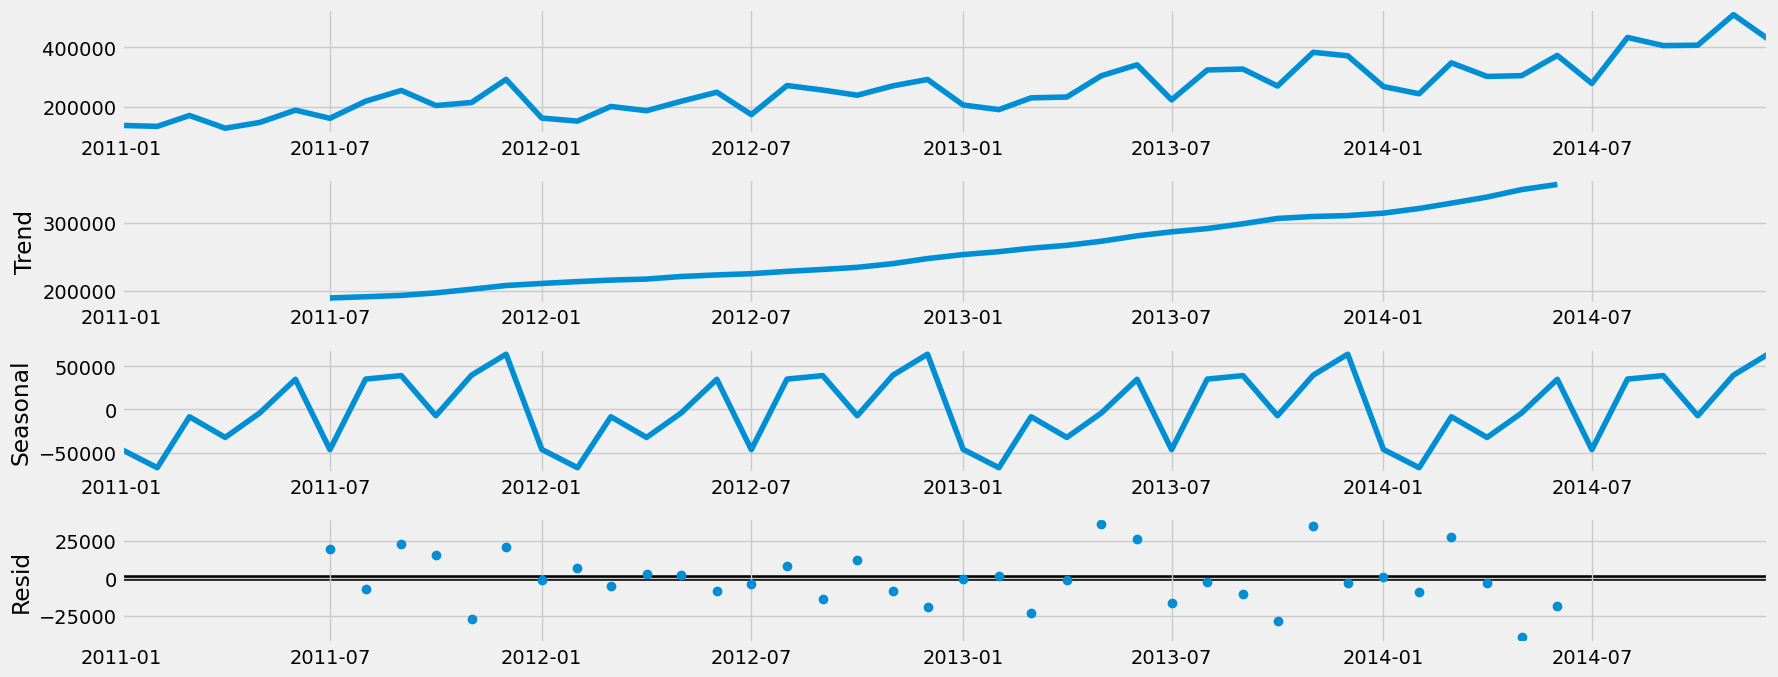

In [12]:
decomposition.plot()
plt.show()

### Testing for stationarity

In [13]:

from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(sub_df['sales'])

Dickey-Fuller Stationarity test:
Test Statistic                  0.046295
p-value                         0.962197
Number of Lags Used             2.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64


### Decomposition and Dickey-Fuller Test Interpretation

#### Null hypothesis: There is a unit root in the Time Series( our Time Series is non-stationary) for disprove the null hypothesis we performed the following decomposition and test:
#### The first chart is the data itself, which is called the level.
#### The second is the underlying trend, the trend in the chart above gradually rises up in a linear fashion from 2012. the overall trend continues to increase all the way until the half of 2014. This is called a dominant trend.
#### The third component is seasonality. Here, we can see seasonal fluctuations that change at regular intervals ( as we can see 6th and 12th months of each year have the highest sales and then gradually decrease. 
#### The fourth is the noise (residual), what’s left of the data after the trend and seasonality have been extracted.Most of the noises can be seen from the second half of 2012 onwards.
#### In Dickey-Fuller Stationarity test result, the p-value which indicates whether the test result is significant. A “significant” result would be a p-value of less than 0.05, so here the p-value is 0.96 indicates weak evidence against the null hypothesis, on the other hand the "Test Statistic" larger than critical value. 
#### Based on above results we fail to reject the null hypothesis and the time series is non-stationary, so we can’t forecast with non-stationary data, and first need to make it stationary.

## Autocorrelation Test

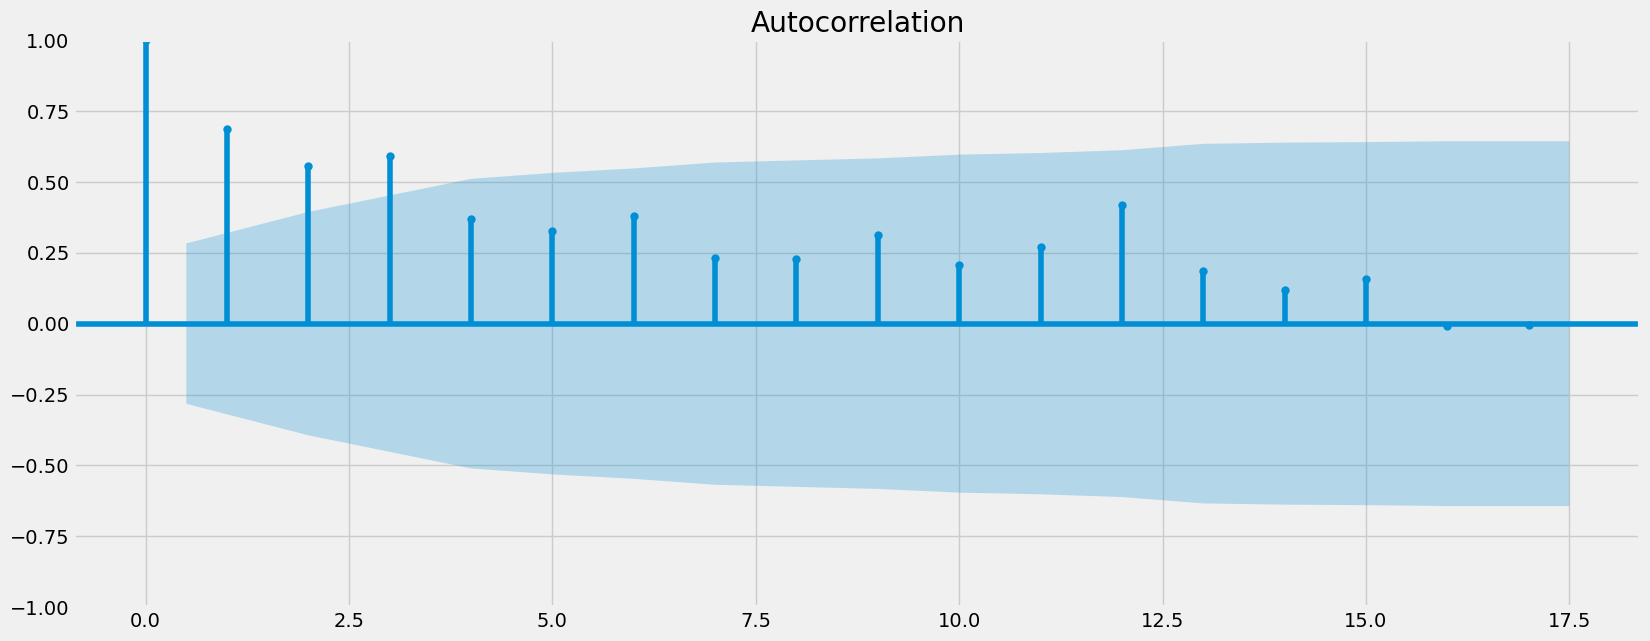

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(sub_df)
plt.show()

## Stationarizing

In [15]:
data_diff = sub_df - sub_df.shift(1)

In [16]:
data_diff.dropna(inplace = True)

In [17]:
data_diff.head()

,sales
datetime,
2011-02-01,-3271.0
2011-03-01,36486.0
2011-04-01,-42623.0
2011-05-01,19314.0
2011-06-01,41191.0


In [18]:
data_diff.columns

Index(['sales'], dtype='object')

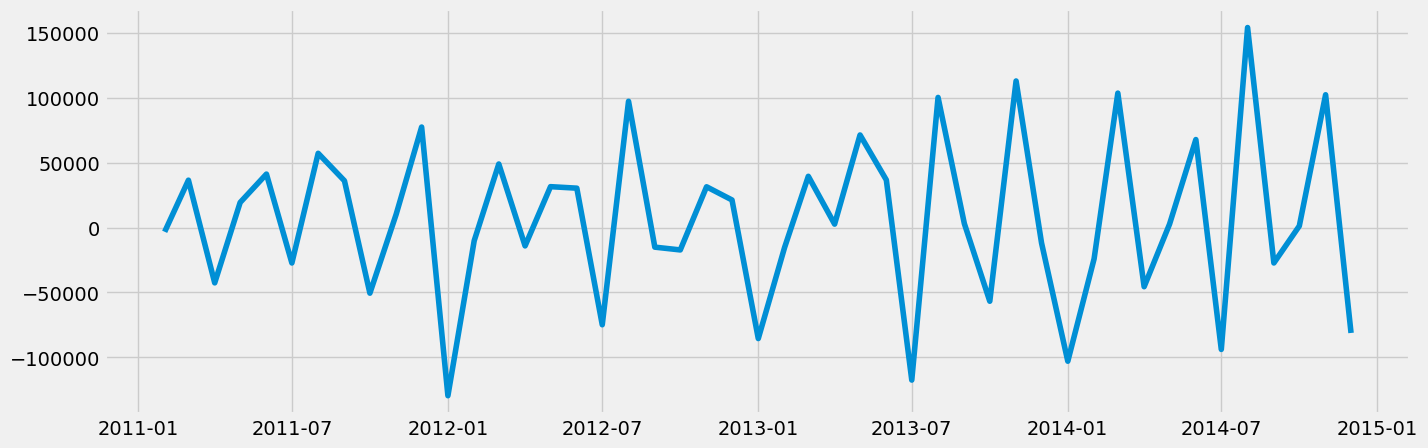

In [19]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [20]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -6.431155e+00
p-value                        1.696115e-08
Number of Lags Used            1.000000e+01
Number of Observations Used    3.600000e+01
Critical Value (1%)           -3.626652e+00
Critical Value (5%)           -2.945951e+00
Critical Value (10%)          -2.611671e+00
dtype: float64


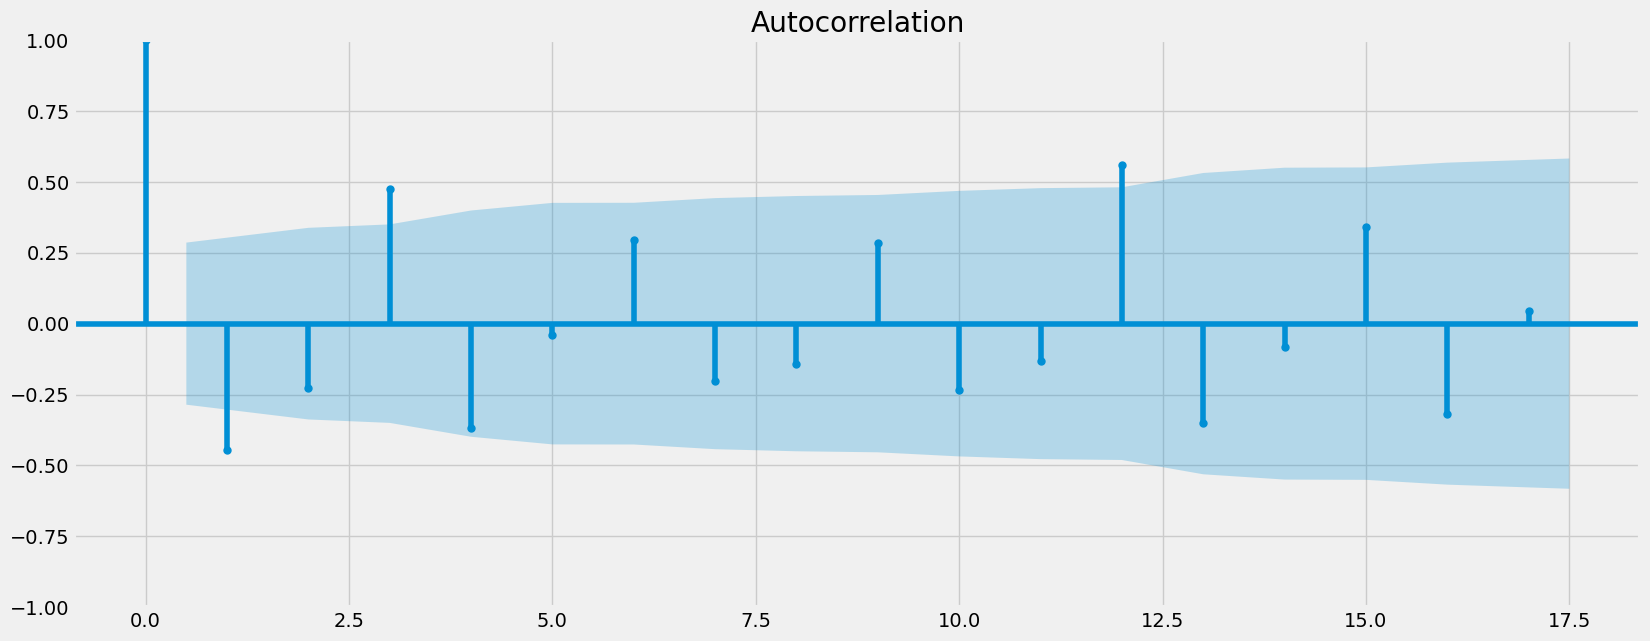

In [21]:
plot_acf(data_diff)
plt.show()

### Conclusion
#### After stationarizing the time series by using Differencing technique, we can see that the Test Statistic is smaller than the critical value and also the p-value is less than 0.05, so we have a stationary time series and we can predict the sales trends.


In [22]:
data_diff.to_csv(os.path.join(path, '02 Data','Prepared Data', 'GlobalSuperstore_clean_stationarized.csv'))